## import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
sns.set()

## read out the relevant files

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')

## lets see how the files look like 

In [3]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [59]:
train['country'].nunique()

18

In [4]:
train.shape

(21454, 19)

In [5]:
train.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [7]:
train.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,2010.060874,0.028259,0.038222,0.028644,0.012689,0.018386,0.873800,95.756775,21.034265,13.999061,1.486849,0.714891,8.506543,289.722268,402.608539,0.350736
std,4.799579,0.097490,0.113562,0.077367,0.032745,0.040421,0.239294,209.704761,16.751106,23.715485,6.550171,2.383701,21.090378,238.811778,321.517285,0.194376
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105306,0.112080,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000043,0.000124,0.897867,3.848533,5.610515,0.798841,0.000000,0.001325,0.000000,115.890873,126.379463,0.195772
50%,2011.000000,0.000000,0.000198,0.000709,0.001001,0.001871,0.991919,17.632672,18.509291,2.770159,0.000516,0.029151,0.137333,256.736472,327.271973,0.293574
75%,2014.000000,0.000000,0.007987,0.009868,0.008128,0.014936,0.999532,63.225683,33.590293,12.621501,0.152364,0.381969,4.830194,401.153071,643.910675,0.499003
max,2016.000000,0.969956,0.877116,0.685010,0.515534,0.649159,1.000000,1741.256516,80.064918,98.784092,99.164018,56.201637,382.932769,1897.351575,1769.523906,1.000000


In [8]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [9]:
test.shape

(7194, 18)

In [10]:
test.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline'],
      dtype='object')

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       7194 non-null   object 
 1   country                                  7194 non-null   object 
 2   year                                     7194 non-null   int64  
 3   urban_or_rural                           7194 non-null   object 
 4   ghsl_water_surface                       7194 non-null   float64
 5   ghsl_built_pre_1975                      7194 non-null   float64
 6   ghsl_built_1975_to_1990                  7194 non-null   float64
 7   ghsl_built_1990_to_2000                  7194 non-null   float64
 8   ghsl_built_2000_to_2014                  7194 non-null   float64
 9   ghsl_not_built_up                        7194 non-null   float64
 10  ghsl_pop_density                         7194 no

In [12]:
test.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,2010.899778,0.023317,0.049325,0.025364,0.016767,0.018319,0.866908,93.147365,21.285033,14.318006,2.212083,0.634295,11.508951,332.979023,686.113119
std,3.651409,0.087915,0.132582,0.057233,0.038079,0.039703,0.252557,211.196451,14.916804,24.510227,8.683106,2.383202,37.313751,341.906808,368.546747
min,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.437825,0.898246
25%,2010.000000,0.000000,0.000000,0.000000,0.000019,0.000075,0.889836,1.071279,7.855023,0.459067,0.000000,0.001444,0.000000,101.060708,409.104775
50%,2011.000000,0.000000,0.000089,0.000320,0.000720,0.001359,0.994922,12.290615,21.105082,2.087011,0.002072,0.052594,0.000000,241.468141,759.849023
75%,2014.000000,0.000000,0.008020,0.010774,0.012036,0.015915,0.999738,66.695301,31.998608,14.174194,0.222664,0.351605,5.543974,415.621994,954.987511
max,2016.000000,0.991100,0.894608,0.506349,0.275297,0.359931,1.000000,1902.876955,74.401875,97.210607,96.978486,47.232629,403.455783,1908.105037,1748.559242


In [13]:
SampleSubmission.head()

,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [14]:
SampleSubmission.shape

(7194, 2)

## Lets explore our data to see some insight

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='nighttime_lights', ylabel='Target'>

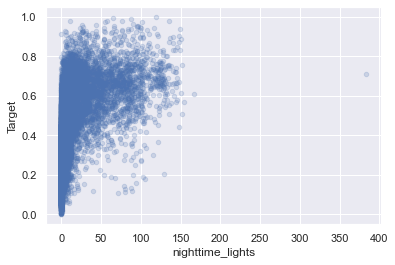

In [15]:
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ghsl_built_pre_1975', ylabel='Target'>

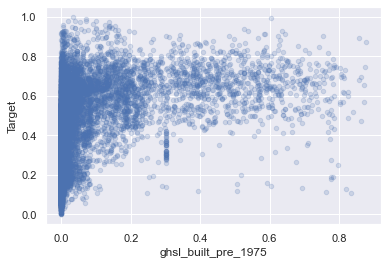

In [16]:
train.plot(x='ghsl_built_pre_1975', y='Target', kind='scatter', alpha=0.2)

<AxesSubplot:title={'center':'Target'}, xlabel='urban_or_rural'>

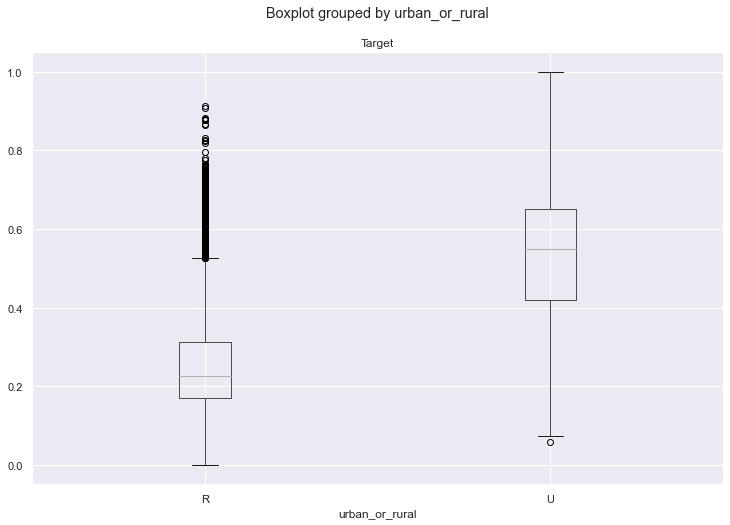

In [17]:
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

In [18]:
find_data = train.groupby('country')

In [19]:
find_data.sum()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
country,,,,,,,,,,,,,,,,
Cameroon,2090203,14.054691,93.032203,42.943986,21.658811,10.784486,858.525823,213696.958763,11900.909980,21434.221133,447.754782,709.922016,12696.127994,3.123918e+05,3.256935e+05,398.107032
Central African Republic,460704,6.218998,16.335665,1.198860,4.234434,1.770423,201.241620,20598.243335,1764.657993,3003.296631,336.718532,151.810511,661.709287,6.072099e+04,2.360450e+05,48.039230
Cote d'Ivoire,965830,18.589008,78.252120,6.880925,6.943039,9.296283,361.038626,73698.515341,2700.939493,10960.531736,214.584479,227.563524,10797.406023,9.903400e+04,9.155030e+04,228.319761
Ethiopia,3460873,4.574328,23.376685,37.395586,14.583705,24.530186,1616.539509,188393.018523,43949.608713,16246.882040,608.034942,286.461326,12073.955067,5.631433e+05,8.225388e+05,401.519400
Ghana,2849605,62.498077,140.035705,69.268919,47.610054,39.877107,1059.710138,166839.691602,16564.112743,32730.426993,1978.846070,1063.756615,22769.601956,3.406199e+05,2.846865e+05,683.957133
Guinea,1189307,40.099645,39.890911,20.129886,9.319441,12.521281,471.038836,58351.794507,3094.176327,12213.550463,349.785238,517.763828,2899.977937,1.553573e+05,1.133028e+05,198.381470
Kenya,5282454,54.897212,20.865424,38.895449,17.512101,26.056196,2467.773619,211462.533026,76847.083264,26878.795914,4390.472270,1021.771887,18210.416808,6.379912e+05,1.240536e+06,939.489341
Lesotho,1597198,0.014924,1.161012,18.208525,10.647978,11.563986,752.403575,14816.326622,16667.925849,4936.327421,90.579238,174.375437,3224.288917,6.796448e+04,2.094959e+05,287.361750
Malawi,3938929,56.994235,29.396658,15.826749,21.690368,41.299859,1791.792130,70185.969136,48263.558763,16278.755605,8625.963329,491.736285,7351.605570,3.962387e+05,9.140789e+05,529.956257


## Lets preprocess this data faa

In [20]:
# lets check out or missing variables

In [21]:
train.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [22]:
train['urban_or_not'] = (train['urban_or_rural'] == 'U').astype(int)
test['urban_or_not'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,urban_or_not
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783,0
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898,0
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320,0
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107,0
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328,1


In [23]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,urban_or_not
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100,0
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681,1
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334,1
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189,1
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501,0


In [24]:
cols_train=train.iloc[:,4:]
cols_train=cols_train.drop('Target',axis=1)

In [25]:
cols_train.shape

(21454, 15)

In [26]:
cols_train.head()

,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,urban_or_not
0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0
1,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0
2,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0
3,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0
4,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,1


In [27]:
cols_train.columns

Index(['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'urban_or_not'],
      dtype='object')

## Off to create a model oo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
X=cols_train
y=train['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [30]:
print(X_train.shape,X_test.shape)

(15017, 15) (6437, 15)


## LinearModel

In [31]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
LRmodel.score(X_test,y_test)

0.6032536675544584

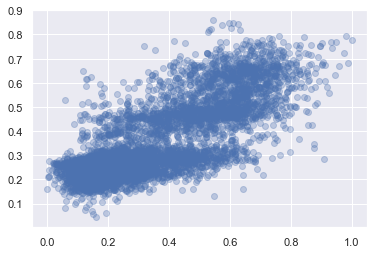

In [32]:
plt.scatter(y_test, LRmodel.predict(X_test), alpha=0.3)

In [33]:
# there is no deinite relationship between them oo
# na wahalla be this oo

## RandomForestRegressor

In [34]:
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train,y_train)
RFmodel.score(X_test,y_test)

0.7176579642585075

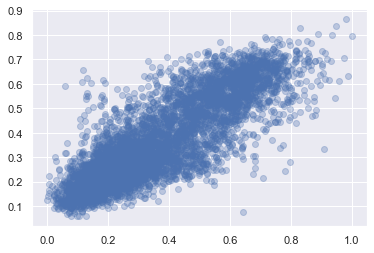

In [35]:
plt.scatter(y_test, RFmodel.predict(X_test), alpha=0.3)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,RFmodel.predict(X_test), squared=False)

0.10365244507871617

In [37]:
for max_depth in [3,5,8,10,14,18]:
    modelRF = RandomForestRegressor()
    modelRF.fit(X_train,y_train)
    print(max_depth,mean_squared_error(y_test,modelRF.predict(X_test),squared=False))

3 0.10382670123886838
5 0.10376074048504573
8 0.10352122997697934
10 0.10398343490916898
14 0.10377276337695923
18 0.10371456749164955


In [38]:
RFmodel = RandomForestRegressor(max_depth=5)
RFmodel.fit(X_train,y_train)
RFmodel.score(X_test,y_test)

0.6861739947113163

## CatBoostRegressor

In [39]:
from catboost import CatBoostRegressor
CBRmodel = CatBoostRegressor()
CBRmodel.fit(X_train,y_train)
CBRmodel.score(X_test,y_test)

Learning rate set to 0.063217
0:	learn: 0.1864707	total: 358ms	remaining: 5m 57s
1:	learn: 0.1797764	total: 385ms	remaining: 3m 11s
2:	learn: 0.1733190	total: 397ms	remaining: 2m 12s
3:	learn: 0.1676106	total: 410ms	remaining: 1m 42s
4:	learn: 0.1621918	total: 422ms	remaining: 1m 24s
5:	learn: 0.1572949	total: 434ms	remaining: 1m 11s
6:	learn: 0.1529245	total: 446ms	remaining: 1m 3s
7:	learn: 0.1488251	total: 457ms	remaining: 56.7s
8:	learn: 0.1449492	total: 470ms	remaining: 51.7s
9:	learn: 0.1415225	total: 483ms	remaining: 47.8s
10:	learn: 0.1384076	total: 498ms	remaining: 44.8s
11:	learn: 0.1355740	total: 514ms	remaining: 42.3s
12:	learn: 0.1331558	total: 528ms	remaining: 40.1s
13:	learn: 0.1309029	total: 542ms	remaining: 38.2s
14:	learn: 0.1289572	total: 558ms	remaining: 36.6s
15:	learn: 0.1269210	total: 572ms	remaining: 35.2s
16:	learn: 0.1252181	total: 589ms	remaining: 34s
17:	learn: 0.1235628	total: 609ms	remaining: 33.2s
18:	learn: 0.1221904	total: 628ms	remaining: 32.4s
19:	lea

0.7239049130606277

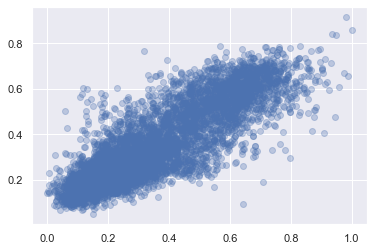

In [40]:
plt.scatter(y_test, CBRmodel.predict(X_test), alpha=0.3)

In [41]:
# shit this catboost make sense jawe oo

In [42]:
for max_depth in [3,5,8,10,14,18]:
    modelCBR = CatBoostRegressor()
    modelCBR.fit(X_train,y_train)
    print(max_depth,mean_squared_error(y_test,modelCBR.predict(X_test),squared=False))

Learning rate set to 0.063217
0:	learn: 0.1864707	total: 15ms	remaining: 15s
1:	learn: 0.1797764	total: 27.4ms	remaining: 13.7s
2:	learn: 0.1733190	total: 39.8ms	remaining: 13.2s
3:	learn: 0.1676106	total: 60.1ms	remaining: 15s
4:	learn: 0.1621918	total: 80.9ms	remaining: 16.1s
5:	learn: 0.1572949	total: 101ms	remaining: 16.8s
6:	learn: 0.1529245	total: 118ms	remaining: 16.8s
7:	learn: 0.1488251	total: 134ms	remaining: 16.6s
8:	learn: 0.1449492	total: 151ms	remaining: 16.6s
9:	learn: 0.1415225	total: 167ms	remaining: 16.5s
10:	learn: 0.1384076	total: 187ms	remaining: 16.8s
11:	learn: 0.1355740	total: 205ms	remaining: 16.9s
12:	learn: 0.1331558	total: 223ms	remaining: 17s
13:	learn: 0.1309029	total: 243ms	remaining: 17.1s
14:	learn: 0.1289572	total: 261ms	remaining: 17.1s
15:	learn: 0.1269210	total: 280ms	remaining: 17.2s
16:	learn: 0.1252181	total: 300ms	remaining: 17.3s
17:	learn: 0.1235628	total: 320ms	remaining: 17.4s
18:	learn: 0.1221904	total: 340ms	remaining: 17.6s
19:	learn: 0.1

## XGBoostRgressor

In [43]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# be like sey i never install xgboost

## lets shaa find the RMSE like that jawe

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test, LRmodel.predict(X_test), squared=False)

0.12287067404589218

In [46]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,urban_or_not
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100,0
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681,1
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334,1
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189,1
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501,0


In [47]:
scaled_test=test.iloc[:,4:]

In [48]:
scaled_test.head()

,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,urban_or_not
0,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100,0
1,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681,1
2,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334,1
3,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189,1
4,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501,0


In [49]:
scaled_test.shape

(7194, 15)

## make i produce my submssion file 

In [50]:
SampleSubmission['Target'] =modelCBR.predict(scaled_test)

In [51]:
SampleSubmission.head()

,ID,Target
0,ID_AAcismbB,0.138652
1,ID_AAeBMsji,0.179146
2,ID_AAjFMjzy,0.579965
3,ID_AAmMOEEC,0.392495
4,ID_ABguzDxp,0.270327


In [ ]:
SampleSubmission.to_csv('CatBoost_Model_Unchained_Advanced_submission.csv',index=False)